In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [349]:
df=pd.read_csv('/content/FAKEnews.csv')
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [350]:
df.shape

(4009, 4)

In [351]:
df.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [352]:
df['Label'].value_counts() #to find the true news and fake news.

0    2137
1    1872
Name: Label, dtype: int64

Here Label '1' signifies fake and '0' implies true information///  

In [353]:
#To sort out duplicate news:
df.drop_duplicates(inplace= True)

In [354]:
df

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [355]:
df=df.drop(['URLs','Body'], axis=1)
df.head()

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1


In [356]:
df['Label'].value_counts() #To filter the repetitive data.

0    2137
1    1872
Name: Label, dtype: int64

*# So, There is no duplicate data available.*

In [357]:
df.isnull().sum() #Extracting the missing true and false news.

Headline    0
Label       0
dtype: int64

In [358]:
df.info

<bound method DataFrame.info of                                                Headline  Label
0            Four ways Bob Corker skewered Donald Trump      1
1     Linklater's war veteran comedy speaks to moder...      1
2     Trump’s Fight With Corker Jeopardizes His Legi...      1
3     Egypt's Cheiron wins tie-up with Pemex for Mex...      1
4           Jason Aldean opens 'SNL' with Vegas tribute      1
...                                                 ...    ...
4004                                    Trends to Watch      0
4005  Trump Jr. Is Soon To Give A 30-Minute Speech F...      0
4006        Ron Paul on Trump, Anarchism & the AltRight      0
4007  China to accept overseas trial data in bid to ...      1
4008  Vice President Mike Pence Leaves NFL Game Beca...      0

[4009 rows x 2 columns]>

# Separate x and y.

In [359]:
x=df.Headline.values #Independent Variable
y=df.Label.values #Dependent Variable////

# split dataset

In [360]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [361]:
#For data preprocessing,
from sklearn.feature_extraction.text import CountVectorizer #To process the Headlines into the numeric format//

In [362]:
cv=CountVectorizer() # Creating object for CountVectorizer.
x_train=cv.fit_transform(xtrain)

In [363]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# ML algorithm (NB)

In [364]:
#Importing multinomial naive bayes algorithm.
from sklearn.naive_bayes import MultinomialNB

In [365]:
#Creating object for MultinomialNB.
model=MultinomialNB()
model.fit(x_train,ytrain)

MultinomialNB()

In [366]:
x_test=cv.transform(xtest)

In [367]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [368]:
model.score(x_test,ytest) #To check the accuracy of model

0.8316708229426434

In [369]:
#To create an news input object:
news= ['JetNation FanDuel League; Week 4', '''Egypt's Cheiron wins tie-up with Pemex for Mexican onshore oil field''']

In [370]:
cv_news=cv.transform(news)

In [371]:
model.predict(cv_news)

array([0, 1])

 *Therefore, The 1st news headline remains '0' or true data and
the 2nd one implies '1' or false inormation////.

# Performance Calculation

In [372]:
pred= model.predict(x_test)

In [373]:
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,

In [374]:
from sklearn.metrics import accuracy_score

In [375]:
accuracy_score(ytest, pred) #To compare the observative objrct(ytest) and new object(pred).

0.8316708229426434

# Confusion Matrix__

In [376]:
from sklearn.metrics import confusion_matrix


In [377]:
confusion_matrix(ytest, pred)

array([[382,  53],
       [ 82, 285]])

In [378]:
accuracy_score(ytest, pred)

0.8316708229426434

HERE THE ACCURACY IS INCREASED///.

In [379]:
from sklearn.metrics import confusion_matrix

In [380]:
confusion_matrix(ytest,pred)

array([[382,  53],
       [ 82, 285]])

In [381]:
from sklearn.metrics import classification_report

In [382]:
print(classification_report (ytest, pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       435
           1       0.84      0.78      0.81       367

    accuracy                           0.83       802
   macro avg       0.83      0.83      0.83       802
weighted avg       0.83      0.83      0.83       802



Confusion Matrix: 
[[382  53]
 [ 82 285]]


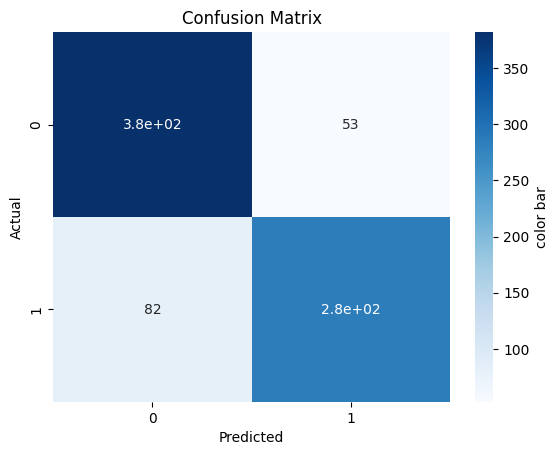

In [383]:
#To plot confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, pred, labels=[0,1])
print('Confusion Matrix: ')
print(cm)

sns.heatmap(cm, cmap="Blues", annot=True, cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()